# About Dataset

Dataset Link - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Workflow of model
1. Collection of data
2. Data Preprocessing
3. Splitting test and training data
4. Model Training
5. Model Evaluation
6. Prediction System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Loading dataset into data frame

In [2]:
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Analysis

In [3]:
# Shape of dataset
dataset.shape

(284807, 31)

In [4]:
# Dataset information 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# mathematical values of dataset

dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# finding null values in dataset

dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# distribution of legit transaction and fraudulent transaction

dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Seperating data for analysis
- 0 : Normal transaction
- 1 : Fraudulent transaction

In [8]:
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]

In [9]:
print("Shape of legit : ", legit.shape)
print("Shape of fraud : ", fraud.shape)

Shape of legit :  (284315, 31)
Shape of fraud :  (492, 31)


In [10]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
# fraud transaction description

fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# comparing the values for both transaction 

dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Under-Sampling
- build a sample dataset having similar distribution of normal and fraudulent transactions.
- number of fraudulent transaction is = 492

In [13]:
legit_sample = dataset.sample(n = 492)

#### Concatinating two samplings

In [14]:
new_dataset = pd.concat([legit_sample, fraud], axis = 0) 

In [15]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9371,13696.0,1.082049,0.462669,1.298102,2.655795,-0.491892,-0.050306,-0.404625,0.052756,0.575973,...,0.034307,0.253500,-0.025826,0.478134,0.321802,-0.001586,-0.021444,0.017895,18.98,0
108908,71128.0,-0.465559,0.737535,1.477075,0.032494,-0.029935,-0.026910,0.393486,0.223560,0.033879,...,-0.001643,0.275324,-0.240460,0.031120,-0.150257,0.368860,0.350974,0.185029,2.99,0
138060,82464.0,1.110426,0.334225,0.354282,1.051996,0.044855,-0.200561,0.197943,0.040737,-0.498097,...,-0.376918,-1.180211,0.224991,-0.062279,0.145145,-0.828918,0.020854,0.019733,24.30,0
195794,131221.0,-0.976960,0.513494,0.738542,-0.263828,0.312258,-0.114441,1.010847,0.016627,0.660536,...,-0.403140,-0.685281,-0.050941,-0.407273,0.060622,0.148913,0.464031,0.282036,91.51,0
162716,115315.0,0.264731,0.301753,-1.245641,1.049859,2.037196,-0.842445,0.821346,-0.268738,-0.243213,...,0.281232,0.935462,0.102669,-1.052364,-1.433904,-0.607970,0.380510,0.362018,1.00,0


In [16]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [17]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [18]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93616.798780,0.099635,0.083018,0.043804,-0.030791,-0.028318,-0.064738,0.089828,-0.039855,0.114388,...,0.054017,-0.015497,-0.009532,0.010327,0.023884,0.027272,-0.011106,0.016371,-0.011012,85.877764
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Data Visualization

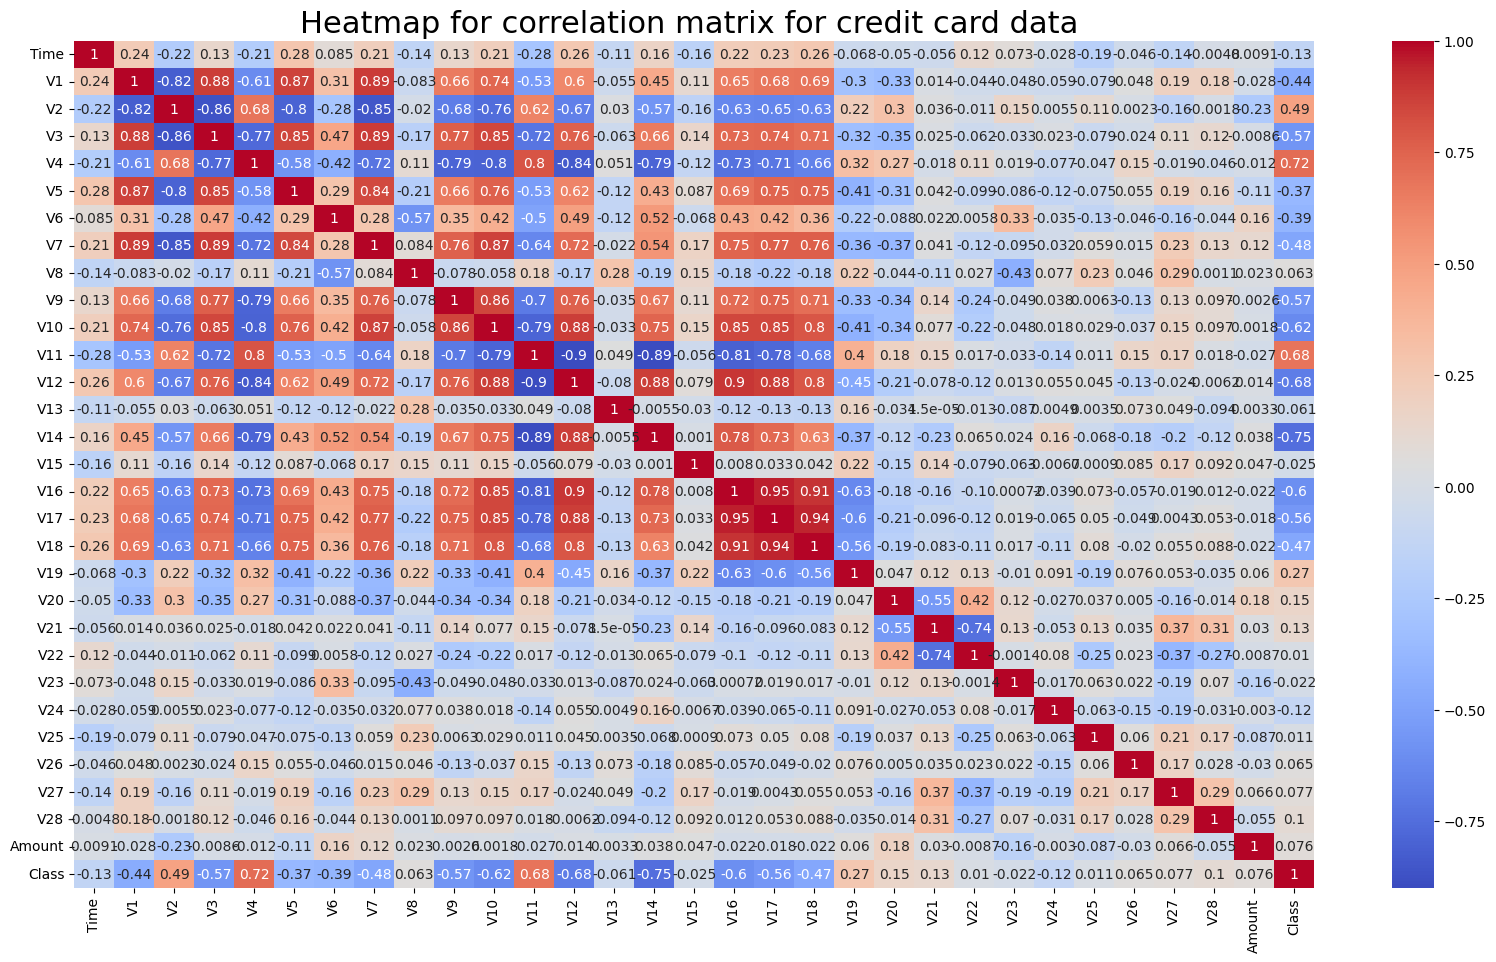

In [20]:
plt.figure(figsize = (20,11))
# heatmap size in ration 16:9

sns.heatmap(new_dataset.corr(), annot = True, cmap = 'coolwarm')
# heatmap parameters

plt.title("Heatmap for correlation matrix for credit card data ", fontsize = 22)
plt.show()

### Splitting the data into features and Targets

In [21]:
X = new_dataset.drop(columns = 'Class', axis = 1)
Y = new_dataset['Class']

In [22]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9371,13696.0,1.082049,0.462669,1.298102,2.655795,-0.491892,-0.050306,-0.404625,0.052756,0.575973,...,-0.159410,0.034307,0.253500,-0.025826,0.478134,0.321802,-0.001586,-0.021444,0.017895,18.98
108908,71128.0,-0.465559,0.737535,1.477075,0.032494,-0.029935,-0.026910,0.393486,0.223560,0.033879,...,0.032012,-0.001643,0.275324,-0.240460,0.031120,-0.150257,0.368860,0.350974,0.185029,2.99
138060,82464.0,1.110426,0.334225,0.354282,1.051996,0.044855,-0.200561,0.197943,0.040737,-0.498097,...,-0.111978,-0.376918,-1.180211,0.224991,-0.062279,0.145145,-0.828918,0.020854,0.019733,24.30
195794,131221.0,-0.976960,0.513494,0.738542,-0.263828,0.312258,-0.114441,1.010847,0.016627,0.660536,...,0.150512,-0.403140,-0.685281,-0.050941,-0.407273,0.060622,0.148913,0.464031,0.282036,91.51
162716,115315.0,0.264731,0.301753,-1.245641,1.049859,2.037196,-0.842445,0.821346,-0.268738,-0.243213,...,-0.026126,0.281232,0.935462,0.102669,-1.052364,-1.433904,-0.607970,0.380510,0.362018,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [23]:
Y

9371      0
108908    0
138060    0
195794    0
162716    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

### Splitting the data into training and testing data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)

In [25]:
print("Shape of X_train ", X_train.shape)
print("Shape of X_test ", X_test.shape)
print("Shape of Y_train ", Y_train.shape)
print("Shape of Y_test ", Y_test.shape)

Shape of X_train  (787, 30)
Shape of X_test  (197, 30)
Shape of Y_train  (787,)
Shape of Y_test  (197,)


## Model Training

In [26]:
# Logistic Regression

lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [27]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [28]:
# Naive-Bayes

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [29]:
# Decision Tree 

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth = 3)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

## Model Evaluation

### Accuracy Score

In [30]:
# Logistic Regression

# accuracy on training data 

X_train_prediction = lr_model.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("Accuracy on Training data ",traning_data_accuracy)



# accuracy on testing data 

X_test_prediction = lr_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("Accuracy on Testing data ",test_data_accuracy)

Accuracy on Training data  0.9428208386277002
Accuracy on Testing data  0.934010152284264


In [31]:
# KNN

# accuracy on training data 

X_train_prediction = knn_model.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("Accuracy on Training data ",traning_data_accuracy)



# accuracy on testing data 

X_test_prediction = knn_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("Accuracy on Testing data ",test_data_accuracy)

Accuracy on Training data  0.7407878017789072
Accuracy on Testing data  0.6243654822335025


In [32]:
# Naive-Bayes

# accuracy on training data 

X_train_prediction = nb_model.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("Accuracy on Training data ",traning_data_accuracy)



# accuracy on testing data 

X_test_prediction = nb_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("Accuracy on Testing data ",test_data_accuracy)

Accuracy on Training data  0.8487928843710292
Accuracy on Testing data  0.868020304568528


In [33]:
# Decision Tree

# accuracy on training data 

X_train_prediction = dt_model.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("Accuracy on Training data ",traning_data_accuracy)



# accuracy on testing data 

X_test_prediction = dt_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("Accuracy on Testing data ",test_data_accuracy)

Accuracy on Training data  0.9529860228716646
Accuracy on Testing data  0.9238578680203046


#### So we see that Logistic Regression and Decision Tree model give the best Accuracy among all the other models,
#### For our prediction system we are going to use "Logistic Regression" model.

## Prediction System

In [36]:
# taking input the information about the transaction

input_value = input("Enter the transaction details: \n\n")

# Converting it in the required format

elements = input_value.split(",")

float_list = []
for element in elements:
    float_list.append(float(element))
    
transaction_info = np.array(float_list).reshape(1, -1)

pred = lr_model.predict(transaction_info)

print("\n\n")

if pred == [0]:
    print("The transaction is : Legit")
    
else:
    print("The transaction is : Fraudulent")
    
print("\n\n")

Enter the transaction details: 

169141,-0.724628052668182,1.78704638575614,-1.71633231323031,-0.0690679549621164,0.634686021241264,-1.61808148658173,0.90782549078792,0.37760775297163,-0.681575558108609,-1.40137190864925,-1.10363356079775,-0.267107313606401,-0.816074604332486,0.105036636654737,-0.261439392221791,-0.500035686640393,1.31021321212206,0.272357667627685,0.275140405439125,-0.405770212884341,0.299178643960205,0.742150691182642,-0.223547020361302,-0.150050356073641,-0.168911619591966,-0.126616544917737,-0.187866805888968,0.0923899689876027,5.17



The transaction is : Legit





C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
